<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/%5Btubes%5D_damin_kel_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import google drive untuk load file yang ada di drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/praktikum/WA_Fn-UseC_-Telco-Customer-Churn.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###check struktur dari data yang kita punya

In [ ]:
df.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


dari hasil di atas tidak ada variable dengan data null

In [ ]:
df.shape

(7043, 21)

di dataset yang kita punya ada 7k row dan 21 columns

##check ringkasan statistik dari dataset

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##analisis data categorical yang ada di dataset

In [ ]:
df.select_dtypes(include = "object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
#cek banyak data categorical
len(df.select_dtypes(include = "object").columns)

18

dapat dilihat pada dataset kita ada 18 variable categorical

## analisis numerical variable

In [ ]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
#cek banyak data numeric

In [ ]:
len(df.select_dtypes(include=["int64","float64"]).columns)

3

In [ ]:
df.select_dtypes(include=["int64","float64"])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


## eksekusi datatypes yang kurang tepat

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

bisa dilihat dari type variable pada MonthlyCharges dan Totalcharges agak aneh padahal mereka memiliki nama sama namun beda data types

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

disini bisa kita lihat data totalcharges itu di input sebagai string. jadi selanjutnya kita convert data ini ke numerical

In [ ]:
#convert ke data numeric
pd.to_numeric(df.TotalCharges)

ValueError: ignored

dari pesan error diatas dapat dilihat kalau data yang kosong dalam variable totalcharges diisi dengan space (" ").

cek data kosong yang diisi dengan space

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df[df.TotalCharges != ' '].shape

(7032, 21)

dapat dilihat dataset yang kosong adalah 7043-7032 = 11. karena data yang kosong tersebut tidak banyak jadi kita hapus data tersebut

In [ ]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 21)

setalah menghilangkan data yang kosong sekarang kita bisa mengubah data totalcharges tersebut ke data numerical

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
#cek typenya apakah sudah benar
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## eksekusi data yang null


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

bisa dilihat dari hasil diatas kita tidak punya data null sehingga tidak perlu melakukan analisis lebih lanjut dari data null

## Eksekusi dan analisis data yang nilai nya tidak diketahui

In [ ]:
#bikin fungsi untuk menampilkan variabel value uniknya
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


berberapa kolom bisa kita lihat ada no internet service dan no phone service, yang mana data itu bisa diganti dengan no saja

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## Eksekusi Outlier untuk datatype numerical

In [ ]:
#membuat fungsi untuk outlier(distplot + boxplot) dari variable numerical
def fn_dist_box(dataset,column):
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(dataset[column], color = 'purple')
    pltname = 'Distplot of ' + column
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(pltname)

    plt.subplot(122)
#     sns.boxplot(y = column, data = dataset, fliersize = 21)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
#     plt.boxplot(dataset[column], flierprops = red_diamond)
    pltname = 'Boxplot of ' + column
    plt.title(pltname)

    plt.tight_layout(pad = 10)
    plt.show()

In [ ]:
#fungsi untuk menghitung min dan max range outlier dari variabel numerik
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [ ]:
df1.select_dtypes(include=["int64","float64"]).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Analisis kolom 'SeniorCitizen'

In [ ]:
df1['SeniorCitizen'].value_counts().sort_values(ascending = False).head()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

karena nilai dari senior citizen cuma 0 dan 1 saja maka kita tidak perlu analisa outliernya

Analisis kolom 'tenure'

In [ ]:
df1['tenure'].value_counts().sort_values(ascending = False).head()

1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

In [ ]:
df1['tenure'].describe(percentiles = [0.75,0.99,0.999])

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
50%        29.000000
75%        55.000000
99%        72.000000
99.9%      72.000000
max        72.000000
Name: tenure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


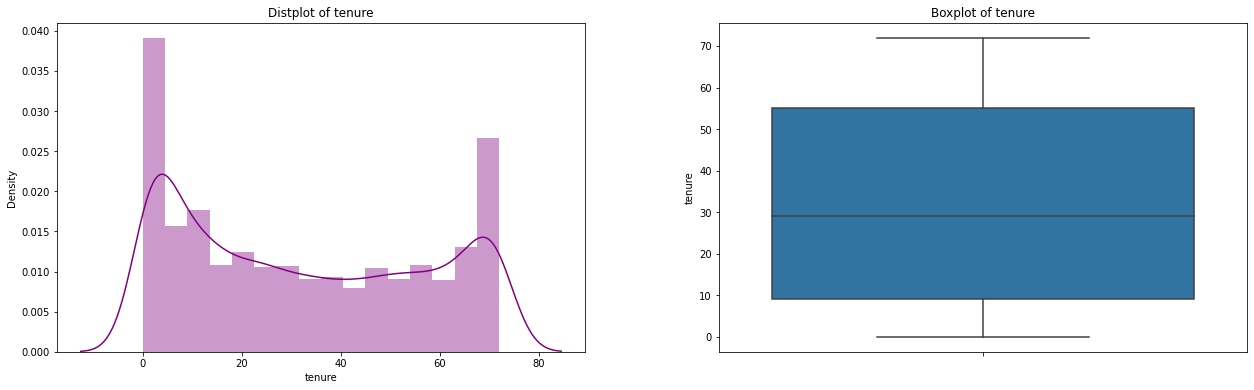

In [ ]:
fn_dist_box(df,'tenure')

In [ ]:
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

46.0


In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("nilai min sebelum ada outlier : {}".format(Min_value))
print("nilai max sesudah ada outlier : {}".format(Max_value))

nilai min sebelum ada outlier : -60.0
nilai max sesudah ada outlier : 124.0


analisis kolom 'monthly charger'

In [ ]:
df1['MonthlyCharges'].value_counts().sort_values(ascending = False).head()

20.05    61
19.90    44
19.95    44
19.85    44
19.65    43
Name: MonthlyCharges, dtype: int64

In [ ]:
df1['MonthlyCharges'].describe(percentiles = [0.75,0.99,0.999])

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
50%        70.350000
75%        89.862500
99%       114.734500
99.9%     117.596900
max       118.750000
Name: MonthlyCharges, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


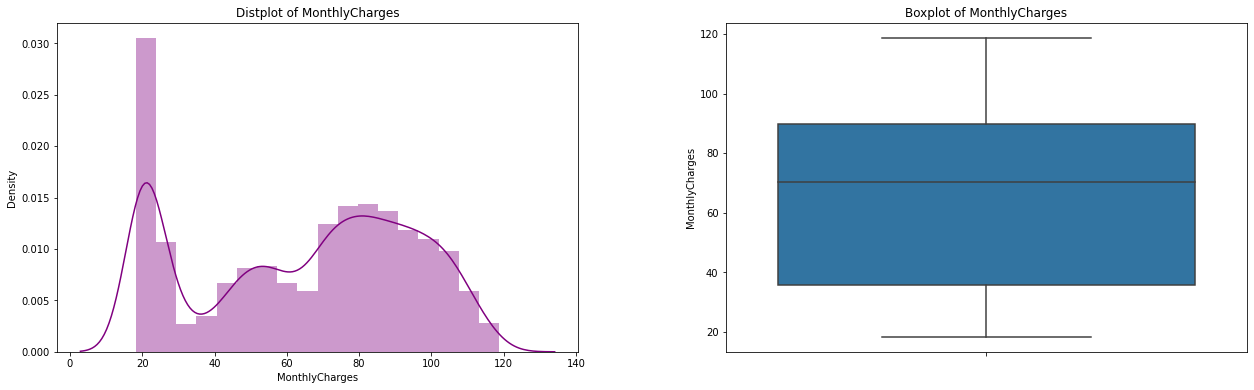

In [ ]:
fn_dist_box(df1,'MonthlyCharges')

In [ ]:
Q1 = df1['MonthlyCharges'].quantile(0.25)
Q3 = df1['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

54.275


In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("nilai min sebelum ada outlier : {}".format(Min_value))
print("nilai max sesudah ada outlier : {}".format(Max_value))

nilai min sebelum ada outlier : -45.824999999999996
nilai max sesudah ada outlier : 171.27499999999998


analisis kolom Total charger

In [ ]:
df1['TotalCharges'].value_counts().sort_values(ascending = False)

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
3886.45     1
1224.05     1
2310.20     1
723.40      1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [ ]:
df1['TotalCharges'].describe(percentiles = [0.75,0.99,0.999])

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
50%      1397.475000
75%      3794.737500
99%      8039.883000
99.9%    8528.483200
max      8684.800000
Name: TotalCharges, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


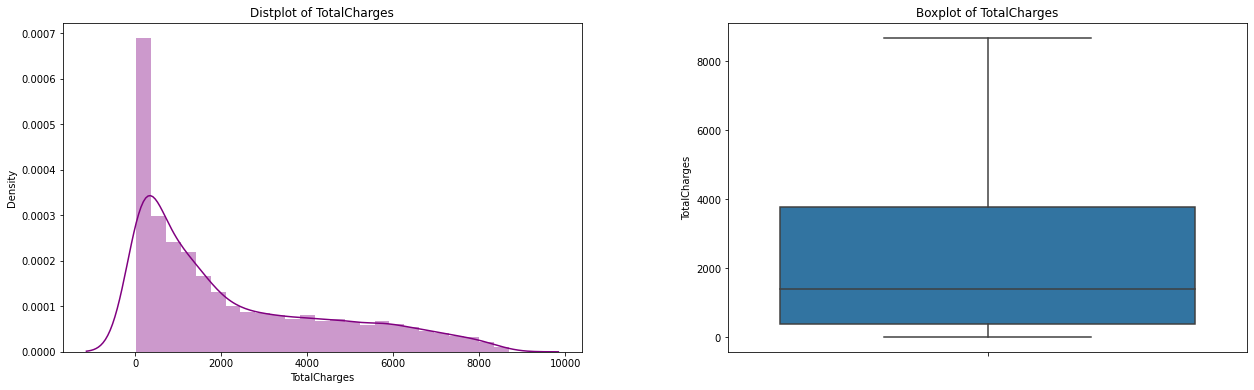

In [ ]:
fn_dist_box(df1,'TotalCharges')

In [ ]:
Q1 = df1['TotalCharges'].quantile(0.25)
Q3 = df1['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3393.2875000000004


In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("nilai min sebelum ada outlier : {}".format(Min_value))
print("nilai max sesudah ada outlier : {}".format(Max_value))

nilai min sebelum ada outlier : -4688.481250000001
nilai max sesudah ada outlier : 8884.66875


## Mengecek data Imbalance dari variabel target wich is 'Churn'

Menganalisis kolom 'Churn'

In [ ]:
df['Churn'].value_counts().sort_values(ascending = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize = True).sort_values(ascending = False) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

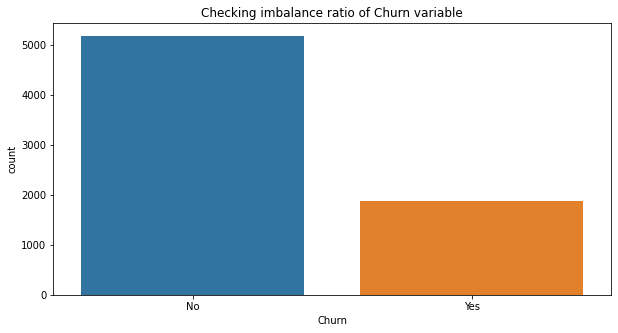

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Churn'], data = df)
plt.title('Checking imbalance ratio of Churn variable')
plt.show()

dapat dilihat diatas bahwa data churnmerupakan imbalance dataset karena 'no' mendominasi dengan 73.463013%

## convert datatype di varabel chategorical menjadi numerik

In [ ]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


dapat dilihat di atas banya data categorical yang berisi value yes dan no dan sekarang kita akan mengubah data tersebut menjadi nilai biner 0 dan 1

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

begitu juga pada data categorical lainya yang punya banyak value kita akan membuat value tersebut menjadi varibel dummi

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5256,1527-SXDPN,0,0,1,1,52,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
805,9926-PJHDQ,1,0,1,1,72,1,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2463,7994-UYIVZ,0,0,1,0,8,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3453,0326-VDYXE,1,0,1,0,70,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4177,3470-BTGQO,0,0,0,1,21,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##skaling variabel numerical selain binari

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
Mult

sebelum masuk ke split data kita akan bersihkan dulu variable yang mungkin tidak bakal berguna

In [ ]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
df2.drop('customerID',axis='columns',inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## split data 

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
#cek the shape
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


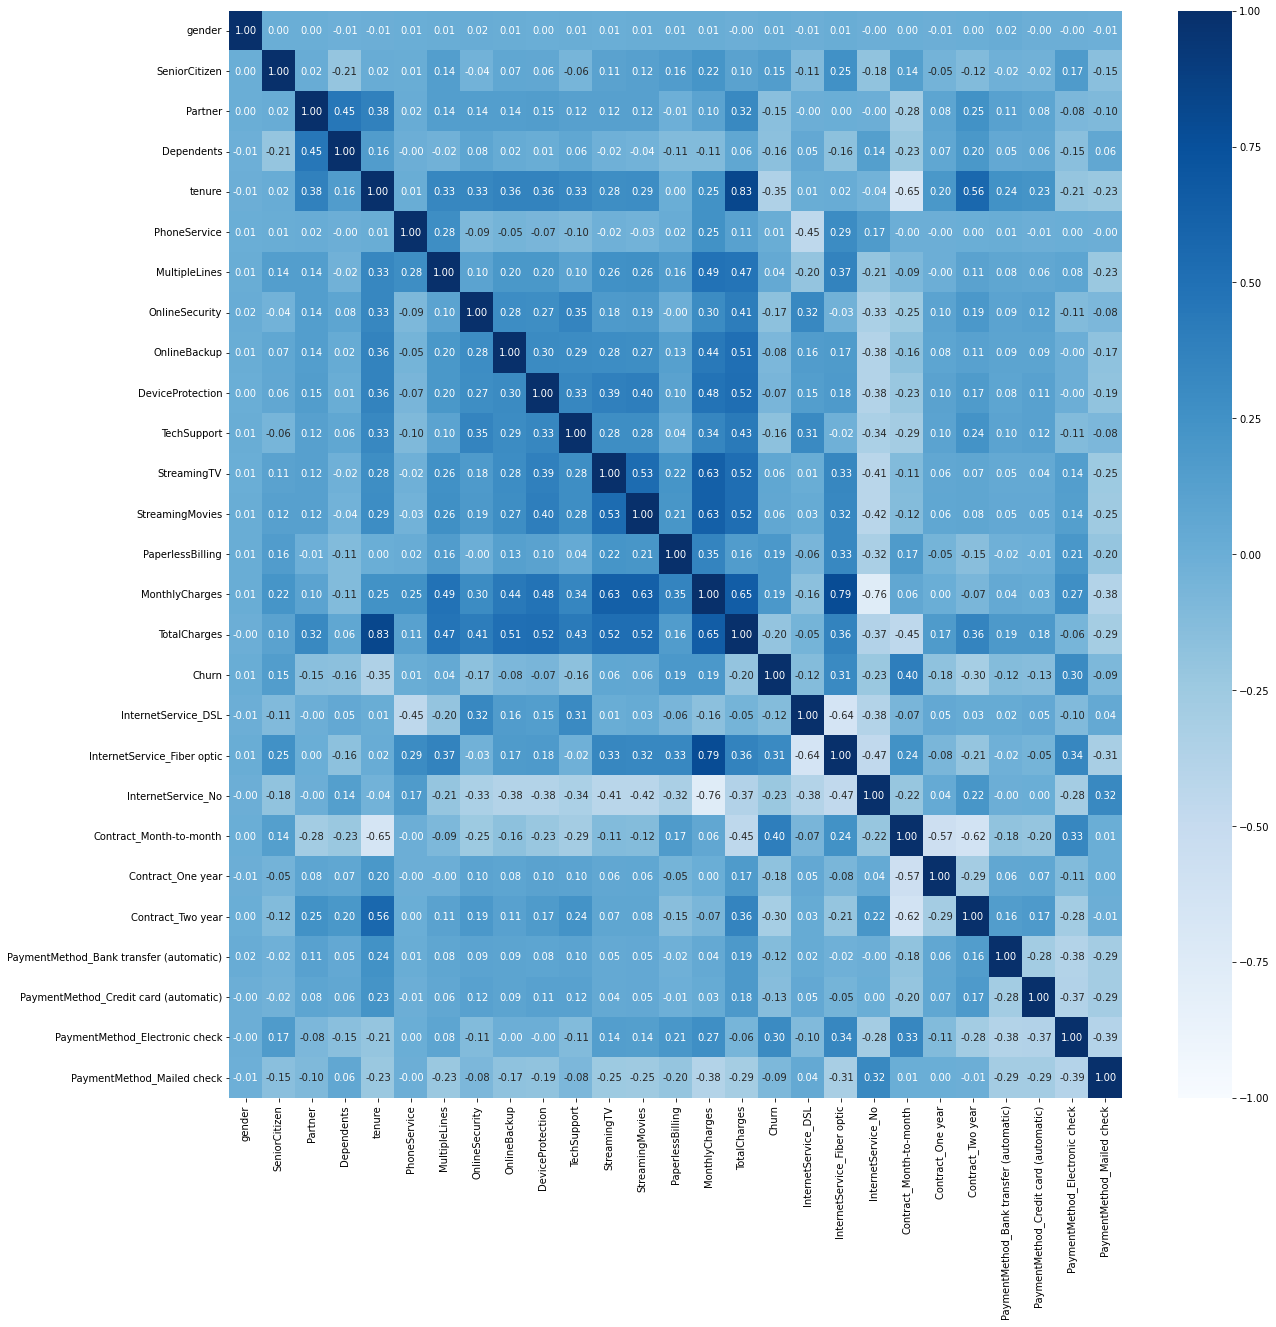

In [ ]:
# Display correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

## Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.728 (0.011)


# Decision tree

## Decision Tree dengan gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


In [ ]:
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

cek skor akurasi dari data test

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print('skor akurasi test-set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

skor akurasi test-set: 0.7690


Skor akurasi dari data training

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print('skor akurasi training-set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


skor akurasi training-set: 0.7963


dari perbandinga skor akurasi training-set adalah 0,7963 sedangkan akurasi test-set menjadi 0,7690.  Kedua nilai ini cukup sebanding.  Jadi, tidak ada tanda-tanda overfitting ataupun  underfitting.

[Text(0.5, 0.875, 'X[19] <= 0.5\ngini = 0.385\nsamples = 5625\nvalue = [4164, 1461]'),
 Text(0.25, 0.625, 'X[17] <= 0.5\ngini = 0.13\nsamples = 2563\nvalue = [2384, 179]'),
 Text(0.125, 0.375, 'X[20] <= 0.5\ngini = 0.073\nsamples = 1769\nvalue = [1702, 67]'),
 Text(0.0625, 0.125, 'gini = 0.027\nsamples = 1016\nvalue = [1002, 14]'),
 Text(0.1875, 0.125, 'gini = 0.131\nsamples = 753\nvalue = [700, 53]'),
 Text(0.375, 0.375, 'X[20] <= 0.5\ngini = 0.242\nsamples = 794\nvalue = [682, 112]'),
 Text(0.3125, 0.125, 'gini = 0.124\nsamples = 361\nvalue = [337, 24]'),
 Text(0.4375, 0.125, 'gini = 0.324\nsamples = 433\nvalue = [345, 88]'),
 Text(0.75, 0.625, 'X[17] <= 0.5\ngini = 0.487\nsamples = 3062\nvalue = [1780, 1282]'),
 Text(0.625, 0.375, 'X[4] <= 0.063\ngini = 0.398\nsamples = 1411\nvalue = [1024, 387]'),
 Text(0.5625, 0.125, 'gini = 0.483\nsamples = 595\nvalue = [353, 242]'),
 Text(0.6875, 0.125, 'gini = 0.292\nsamples = 816\nvalue = [671, 145]'),
 Text(0.875, 0.375, 'X[4] <= 0.204\ngini 

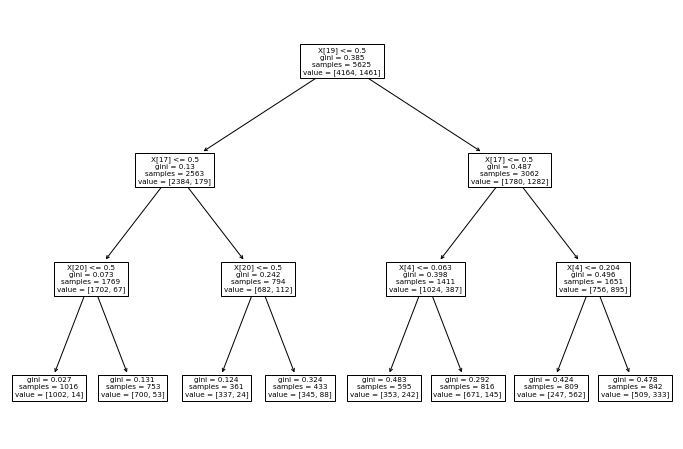

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

## Decision Tree dengan entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

cek akurasi data test

In [ ]:
y_pred_en = clf_en.predict(X_test, )
y_pred_en

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print('Skor akurasi test-set : {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Skor akurasi test-set : 0.7690


cek akurasi data train

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print('skor akurasi training-set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


skor akurasi training-set: 0.7963


dapat kita lihat masing-masing nilai skor akurasi tidak jauh berbeda atau sebanding. sehingga tidak ada tanda-tanda overfitting  ataupun underfitting

[Text(0.5, 0.875, 'X[19] <= 0.5\nentropy = 0.826\nsamples = 5625\nvalue = [4164, 1461]'),
 Text(0.25, 0.625, 'X[20] <= 0.5\nentropy = 0.365\nsamples = 2563\nvalue = [2384, 179]'),
 Text(0.125, 0.375, 'X[14] <= 0.738\nentropy = 0.182\nsamples = 1377\nvalue = [1339, 38]'),
 Text(0.0625, 0.125, 'entropy = 0.103\nsamples = 1044\nvalue = [1030, 14]'),
 Text(0.1875, 0.125, 'entropy = 0.374\nsamples = 333\nvalue = [309, 24]'),
 Text(0.375, 0.375, 'X[12] <= 0.5\nentropy = 0.526\nsamples = 1186\nvalue = [1045, 141]'),
 Text(0.3125, 0.125, 'entropy = 0.278\nsamples = 646\nvalue = [615, 31]'),
 Text(0.4375, 0.125, 'entropy = 0.729\nsamples = 540\nvalue = [430, 110]'),
 Text(0.75, 0.625, 'X[17] <= 0.5\nentropy = 0.981\nsamples = 3062\nvalue = [1780, 1282]'),
 Text(0.625, 0.375, 'X[4] <= 0.063\nentropy = 0.848\nsamples = 1411\nvalue = [1024, 387]'),
 Text(0.5625, 0.125, 'entropy = 0.975\nsamples = 595\nvalue = [353, 242]'),
 Text(0.6875, 0.125, 'entropy = 0.675\nsamples = 816\nvalue = [671, 145]'),

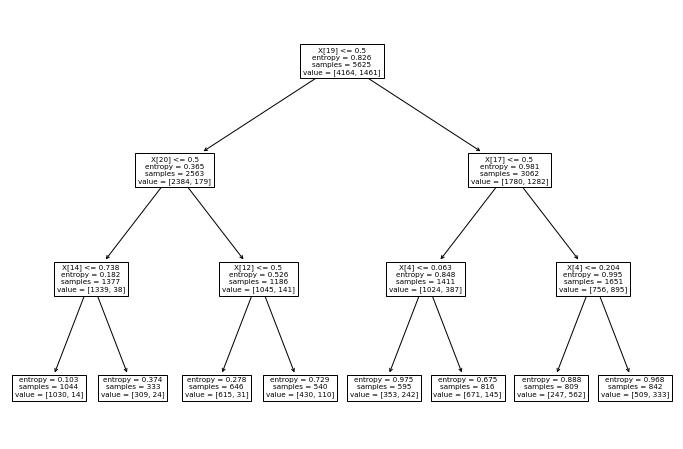

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

## confussion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as pltf
from sklearn.metrics import classification_report

In [ ]:
cmg = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cmg)

Confusion matrix

 [[927  72]
 [253 155]]


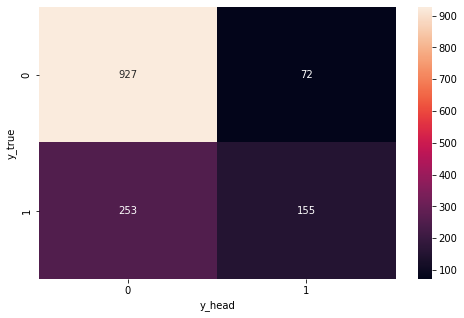

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cmg, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[927  72]
 [253 155]]


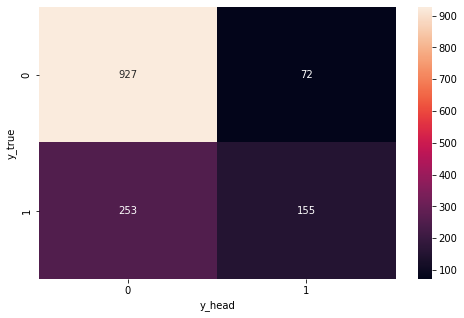

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       999
           1       0.68      0.38      0.49       408

    accuracy                           0.77      1407
   macro avg       0.73      0.65      0.67      1407
weighted avg       0.76      0.77      0.75      1407



KFold class